<a href="https://colab.research.google.com/github/jnsbrdbr/thesis/blob/thesis/part9_2_TTUsvm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import jaccard_score
from scipy.spatial.distance import pdist, squareform

In [2]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [3]:
!pip3 install pickle5
import pickle5 as pickle

     |████████████████████████████████| 256 kB 7.2 MB/s 


In [4]:
with open('/content/drive/MyDrive/10000/unsmote/TUnsmote_Tresult.pkl', "rb") as fh:
  result = pickle.load(fh)

In [5]:
#final data
print(result)

             0         1         2  ...         8         9  label
0    -0.018442 -4.220618 -0.916300  ... -0.010241 -0.181514      1
1    -0.018442 -4.220618 -0.916300  ... -0.010241 -0.181514      1
2    -0.018442 -4.220618 -0.916300  ... -0.010241 -0.181514      1
3    -0.018442 -4.220618 -0.916300  ... -0.010241 -0.181514      1
4    -0.018444 -4.221080 -0.916678  ...  0.057121  0.838856      1
...        ...       ...       ...  ...       ...       ...    ...
9995 -0.264492 -4.771727 -2.334318  ...  0.017370  0.231334      1
9996 -0.264492 -4.771727 -2.334318  ...  0.017370  0.231334      1
9997 -0.264492 -4.771727 -2.334318  ...  0.017370  0.231334      1
9998 -0.264492 -4.771727 -2.334318  ...  0.017370  0.231334      1
9999 -0.264492 -4.771727 -2.334318  ...  0.017370  0.231334      1

[10000 rows x 101 columns]


In [6]:
import copy
result_nonlabel=copy.deepcopy(result)
del result_nonlabel['label']
X=result_nonlabel
y=result.label

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)#

In [10]:
from sklearn.svm import SVC
from sklearn import svm
from sklearn.svm import LinearSVC
import warnings
warnings.filterwarnings('ignore')


svclassifier=svm.LinearSVC(C=0.001,random_state=42,max_iter=50000)
svclassifier.fit(x_train, y_train)
y_pred = svclassifier.predict(x_test)
score = svclassifier.score(x_test, y_test)
print(score)

0.9913333333333333


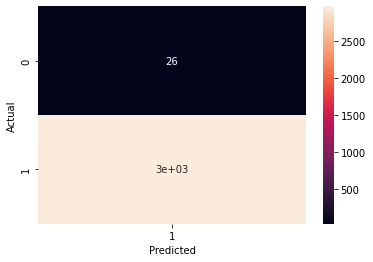

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [12]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

True Positives: 2974
False Positives: 26
True Negatives: 0
False Negatives: 0


In [13]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))


Accuracy:  0.9913333333333333


In [14]:
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

cv = KFold(n_splits=10)# shuffle=True,, random_state=42
scores = cross_val_score(svclassifier, X, y, scoring='accuracy', cv=cv)#,n_jobs=-1

print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.773 (0.226)


In [15]:
#recall

from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score,cross_val_predict
import warnings
warnings.filterwarnings('ignore')

cv = KFold(n_splits=10)#, shuffle=True, random_state=42
scores_recall = cross_val_score(svclassifier,X, y, scoring='recall', cv=cv)#,n_jobs=-1

print('scores_recall: %.3f (%.3f)' % (mean(scores_recall), std(scores_recall)))

scores_recall: 0.777 (0.231)


In [16]:
#precision

from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

cv = KFold(n_splits=10)#, random_state=42, shuffle=True
scores_precision = cross_val_score(svclassifier, X, y, scoring='precision', cv=cv)#,n_jobs=-1

print('scores_precision: %.3f (%.3f)' % (mean(scores_precision), std(scores_precision)))

scores_precision: 0.992 (0.003)


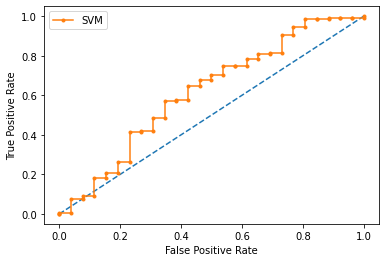


 Logistic ROC AUC 0.616


In [17]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import warnings
warnings.filterwarnings('ignore')


k=svm.LinearSVC(C=0.0001,random_state=42,max_iter=50000)#,max_iter=1000000
k.fit(x_train, y_train)
yhat = k._predict_proba_lr(x_test)
pos_probs = yhat[:, 1]
pyplot.plot([0, 1], [0, 1], linestyle='--')
fpr, tpr, _ = roc_curve(y_test, pos_probs)
pyplot.plot(fpr, tpr, marker='.', label='SVM')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()
roc_auc = roc_auc_score(y_test, pos_probs)
print('\n','Logistic ROC AUC %.3f' % roc_auc)

In [ ]:
#Importing required libraries
from sklearn.model_selection import KFold 
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')
 
#data = load_breast_cancer(as_frame = True)
#df = result.frame
#X = result.iloc[:,:-1]
#y = result.iloc[:,-1]
 
#Implementing cross validation
 
#X = X.sample(frac = 1)
#y= y.sample(frac = 1)
kf = KFold(n_splits=10)#, random_state=None
model = svm.LinearSVC(C=0.001,random_state=42,max_iter=50000)#(solver= 'liblinear')#,max_iter=1000000
 
acc_score = list()
res_tpr = list()
res_fpr = list()
for train_index , test_index in kf.split(X):
    #X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    #y_train , y_test = y[train_index] , y[test_index]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, pred_values, labels=[0, 1]).ravel()
    print(f'True Positives: {tp}')
    print(f'False Positives: {fp}')
    print(f'True Negatives: {tn}')
    print(f'False Negatives: {fn}')
    tpr=(np.divide(tp,(tp+fn)))
    fpr=(np.divide(fp,(fp+tn)))
    if tp==0:
      tpr=0
    if fp==0:
      fpr=0

    print('fpr=%.3f' % (  mean(fpr)))#tpr=%.4f :mean(tpr),
    print('x')
    res_tpr.append(mean(tpr))
    res_fpr.append(mean(fpr))
    print('---------------------')

    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
     
avg_acc_score = np.sum(acc_score)/10
total_tpr=np.sum(res_tpr)/10
total_fpr=np.sum(res_fpr)/10
print('\n\n',' total_fpr=%.3f' % (total_fpr))#total_tpr=%.4f )total_tpr,)

True Positives: 2974
False Positives: 25
True Negatives: 0
False Negatives: 1
fpr=1.000
x
---------------------
True Positives: 2973
False Positives: 26
True Negatives: 0
False Negatives: 1
fpr=1.000
x
---------------------
True Positives: 2977
False Positives: 22
True Negatives: 0
False Negatives: 1
fpr=1.000
x
---------------------
True Positives: 2968
False Positives: 31
True Negatives: 0
False Negatives: 1
fpr=1.000
x
---------------------
True Positives: 2968
False Positives: 30
True Negatives: 0
False Negatives: 2
fpr=1.000
x
---------------------
True Positives: 2969
False Positives: 29
True Negatives: 0
False Negatives: 2
fpr=1.000
x
---------------------
True Positives: 2970
False Positives: 26
True Negatives: 0
False Negatives: 4
fpr=1.000
x
---------------------
True Positives: 2977
False Positives: 21
True Negatives: 0
False Negatives: 2
fpr=1.000
x
---------------------
